In [1]:
import pandas as pd

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df = pd.read_csv('housing.csv',names=column_names, header=None, delimiter=r"\s+")

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:


# Let's summarize the data to see the distribution of data
df.describe()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


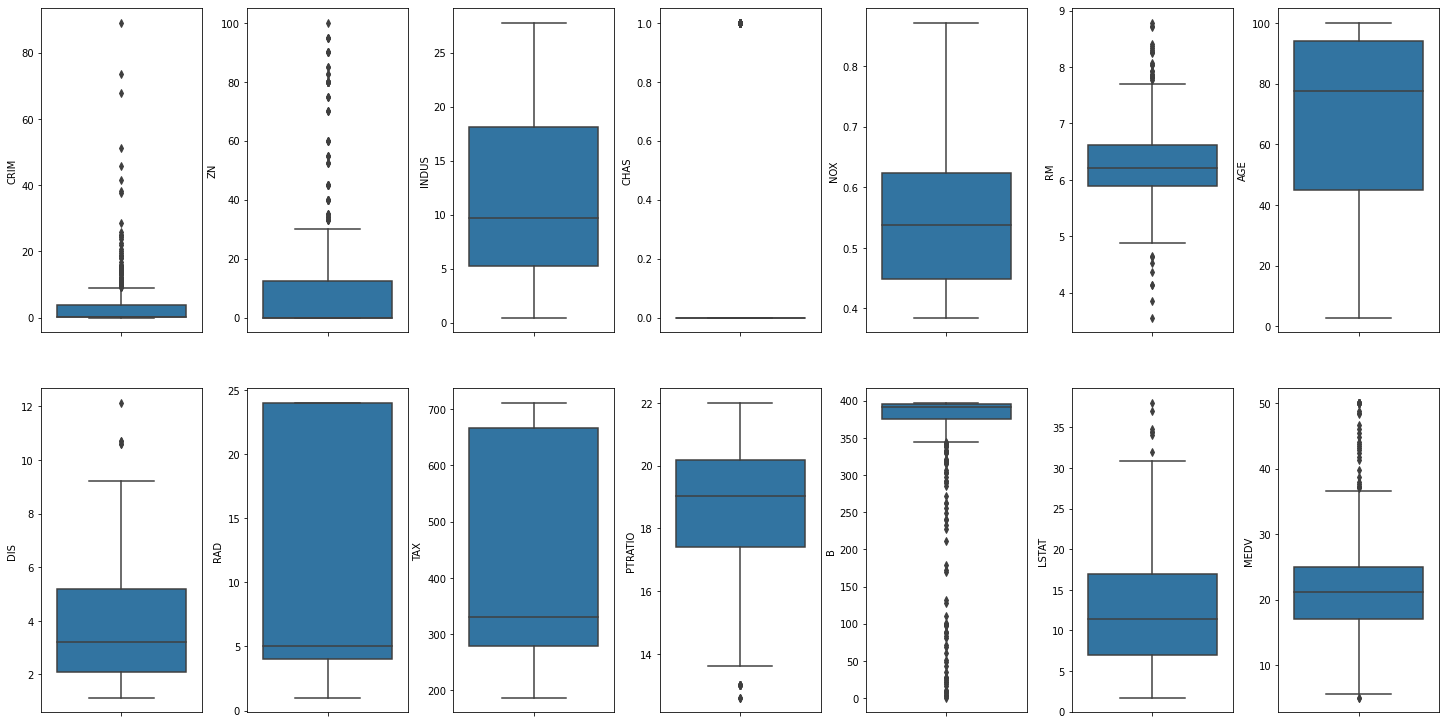

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [7]:
   for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [8]:
df = df[~(df['MEDV'] >= 50.0)]
print(np.shape(df))

(490, 14)


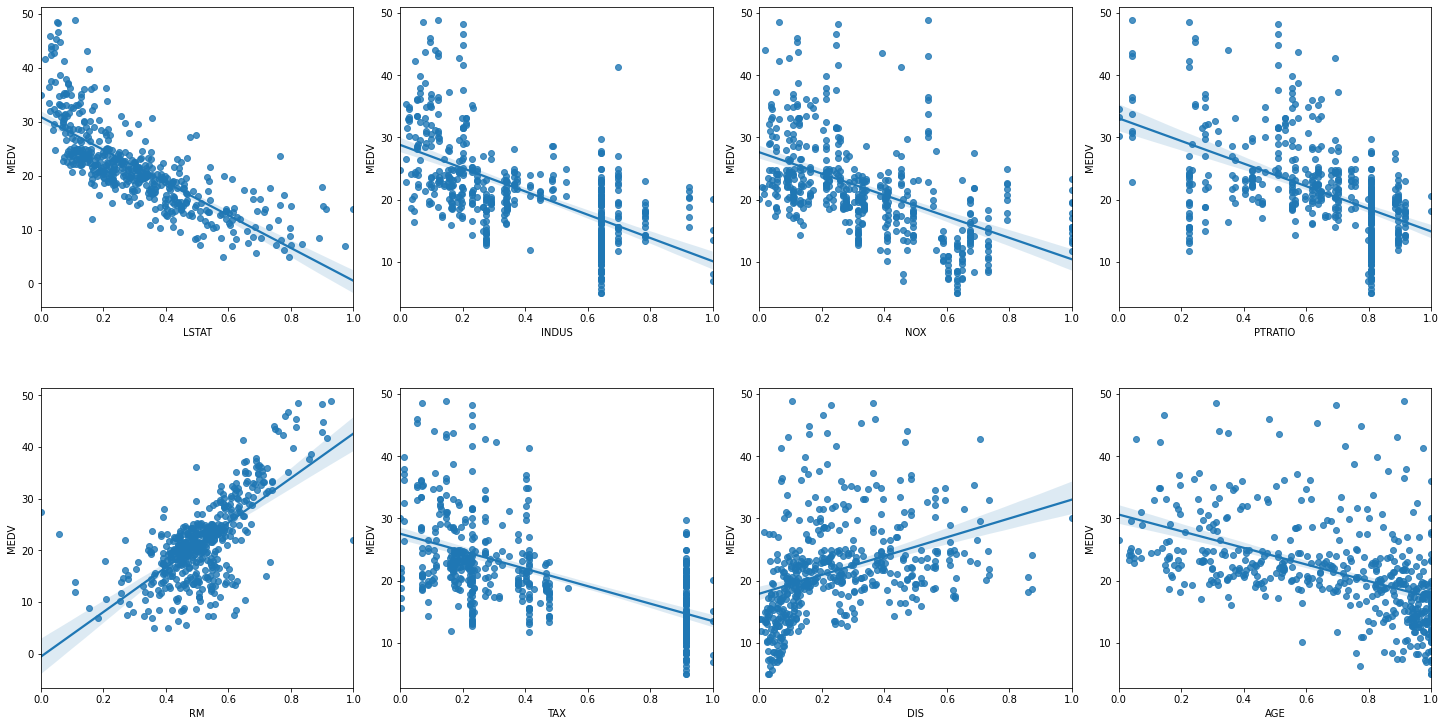

In [11]:

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=30)

In [10]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [13]:
x_train

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
192,0.128925,0.028889,0.039095,0.000000,0.711439,0.270992,0.561627,0.364573
427,0.468741,0.642963,0.730453,0.808511,0.560261,0.914122,0.076564,1.000000
417,0.395665,0.642963,0.674897,0.808511,0.550872,0.914122,0.107266,0.875386
38,0.226452,0.193333,0.234568,0.702128,0.460816,0.175573,0.246626,0.281153
150,0.336760,0.697778,1.000000,0.223404,0.490707,0.412214,0.043769,0.972194
...,...,...,...,...,...,...,...,...
140,0.616282,0.783333,0.491770,0.914894,0.500671,0.477099,0.043214,0.934089
301,0.270631,0.339259,0.327160,0.617021,0.471738,0.223282,0.154420,0.901133
429,0.611281,0.642963,0.730453,0.808511,0.555279,0.914122,0.077428,0.946447
421,0.679911,0.642963,0.730453,0.808511,0.496455,0.914122,0.070722,1.000000


In [14]:
x_test

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
241,0.127258,0.189630,0.094650,0.691489,0.604905,0.272901,0.608717,0.150360
279,0.037510,0.155926,0.053498,0.702128,0.632305,0.110687,0.362137,0.257467
291,0.185885,0.198148,0.098765,0.372340,0.562177,0.270992,0.396260,0.159629
26,0.356488,0.274074,0.314815,0.893617,0.431500,0.229008,0.322581,0.900103
281,0.075577,0.155926,0.053498,0.702128,0.588044,0.110687,0.362137,0.211123
...,...,...,...,...,...,...,...,...
353,0.091970,0.642963,0.685185,0.808511,1.000000,0.914122,0.069858,0.823893
3,0.026674,0.053333,0.150206,0.648936,0.658555,0.066794,0.448173,0.441813
313,0.115032,0.245926,0.222222,0.744681,0.546848,0.190840,0.326139,0.383110
253,0.109197,0.119630,0.539095,0.042553,0.926806,0.146947,0.104782,0.912461


In [16]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rand_f = RandomForestRegressor(verbose=1)

In [19]:
rand_f.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


RandomForestRegressor(verbose=1)

In [20]:
rand_f.predict(x)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


array([29.216, 22.336, 34.784, 34.596, 35.539, 26.436, 22.158, 22.838,
       17.51 , 18.954, 17.674, 19.885, 21.47 , 19.747, 18.562, 19.806,
       22.64 , 17.599, 19.541, 18.639, 13.947, 18.938, 15.368, 14.243,
       16.159, 14.921, 17.136, 15.392, 18.93 , 21.221, 13.338, 19.756,
       14.361, 13.661, 14.014, 19.82 , 20.274, 20.908, 23.516, 30.239,
       34.642, 28.368, 24.051, 24.475, 21.18 , 19.445, 19.976, 17.845,
       16.483, 19.244, 20.2  , 21.09 , 25.2  , 22.226, 18.304, 34.746,
       23.973, 31.261, 22.98 , 19.688, 18.653, 18.904, 22.757, 24.924,
       32.313, 24.214, 19.589, 20.385, 17.943, 20.382, 24.175, 21.572,
       22.876, 23.688, 24.949, 22.005, 21.124, 20.992, 21.179, 20.445,
       27.413, 24.731, 24.16 , 22.963, 23.443, 26.716, 22.089, 22.27 ,
       26.371, 29.237, 23.254, 22.37 , 23.707, 24.914, 21.178, 28.171,
       21.898, 39.628, 40.955, 32.606, 24.537, 25.772, 19.451, 19.901,
       20.025, 18.944, 18.407, 20.162, 19.69 , 19.327, 20.545, 23.735,
      

In [21]:
rand_f.score(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9802592651183881

In [22]:
rand_f.score(x_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.850949378155214